In [94]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,StratifiedKFold

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv("skin_type_final.csv")
data


,Age,Gender,Hydration_Level,Oil_Level,Sensitivity,Humidity,Temperature,Skin_Type
0,36,Male,Low,Low,High,31.9,10.1,Dry
1,36,Female,High,Low,High,30.1,20.5,Combination
2,34,Female,High,Medium,Low,53.0,19.5,Normal
3,51,Male,Medium,High,Low,57.3,22.7,Oily
4,36,Male,High,Medium,Medium,64.4,24.0,Normal
...,...,...,...,...,...,...,...,...
1995,27,Male,Medium,Medium,Medium,63.4,17.3,Normal
1996,59,Male,Medium,Medium,Low,55.9,16.0,Normal
1997,35,Female,Medium,High,Low,49.6,26.8,Oily
1998,36,Male,Medium,Medium,Medium,51.0,23.5,Normal


In [11]:
data.isnull().sum()

Age                0
Gender             0
Hydration_Level    0
Oil_Level          0
Sensitivity        0
Humidity           0
Temperature        0
Skin_Type          0
dtype: int64

In [13]:
data

,Age,Gender,Hydration_Level,Oil_Level,Sensitivity,Humidity,Temperature,Skin_Type
0,36,Male,Low,Low,High,31.9,10.1,Dry
1,36,Female,High,Low,High,30.1,20.5,Combination
2,34,Female,High,Medium,Low,53.0,19.5,Normal
3,51,Male,Medium,High,Low,57.3,22.7,Oily
4,36,Male,High,Medium,Medium,64.4,24.0,Normal
...,...,...,...,...,...,...,...,...
1995,27,Male,Medium,Medium,Medium,63.4,17.3,Normal
1996,59,Male,Medium,Medium,Low,55.9,16.0,Normal
1997,35,Female,Medium,High,Low,49.6,26.8,Oily
1998,36,Male,Medium,Medium,Medium,51.0,23.5,Normal


In [15]:
data.isnull().sum()

Age                0
Gender             0
Hydration_Level    0
Oil_Level          0
Sensitivity        0
Humidity           0
Temperature        0
Skin_Type          0
dtype: int64

In [18]:
lbg=LabelEncoder()
lbh=LabelEncoder()
lbo=LabelEncoder()
lbs=LabelEncoder()
lbt=LabelEncoder()

In [21]:
data['Gender']=lbg.fit_transform(data['Gender'])
data['Hydration_Level']=lbh.fit_transform(data['Hydration_Level'])
data['Oil_Level']=lbo.fit_transform(data['Oil_Level'])
data['Sensitivity']=lbs.fit_transform(data['Sensitivity'])


In [23]:
 data['Skin_Type']=lbt.fit_transform(data['Skin_Type'])

In [25]:
data

,Age,Gender,Hydration_Level,Oil_Level,Sensitivity,Humidity,Temperature,Skin_Type
0,36,1,1,1,0,31.9,10.1,1
1,36,0,0,1,0,30.1,20.5,0
2,34,0,0,2,1,53.0,19.5,2
3,51,1,2,0,1,57.3,22.7,3
4,36,1,0,2,2,64.4,24.0,2
...,...,...,...,...,...,...,...,...
1995,27,1,2,2,2,63.4,17.3,2
1996,59,1,2,2,1,55.9,16.0,2
1997,35,0,2,0,1,49.6,26.8,3
1998,36,1,2,2,2,51.0,23.5,2


### OUTLIER DETECTION

In [28]:
import seaborn as sns

<Axes: >

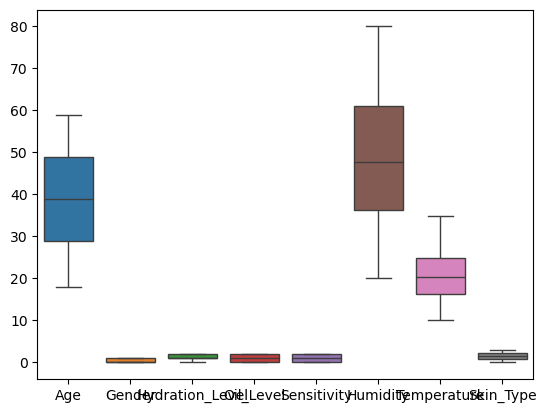

In [30]:
sns.boxplot(data)

In [32]:
#outlier detection
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)

IQR=Q3-Q1
data_out= data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)] # ~ this means Logical NOT


In [34]:
data_out

,Age,Gender,Hydration_Level,Oil_Level,Sensitivity,Humidity,Temperature,Skin_Type
0,36,1,1,1,0,31.9,10.1,1
1,36,0,0,1,0,30.1,20.5,0
2,34,0,0,2,1,53.0,19.5,2
3,51,1,2,0,1,57.3,22.7,3
4,36,1,0,2,2,64.4,24.0,2
...,...,...,...,...,...,...,...,...
1995,27,1,2,2,2,63.4,17.3,2
1996,59,1,2,2,1,55.9,16.0,2
1997,35,0,2,0,1,49.6,26.8,3
1998,36,1,2,2,2,51.0,23.5,2


In [36]:
x=data.drop(['Skin_Type'],axis=1)
y=data['Skin_Type']

In [38]:
x

,Age,Gender,Hydration_Level,Oil_Level,Sensitivity,Humidity,Temperature
0,36,1,1,1,0,31.9,10.1
1,36,0,0,1,0,30.1,20.5
2,34,0,0,2,1,53.0,19.5
3,51,1,2,0,1,57.3,22.7
4,36,1,0,2,2,64.4,24.0
...,...,...,...,...,...,...,...
1995,27,1,2,2,2,63.4,17.3
1996,59,1,2,2,1,55.9,16.0
1997,35,0,2,0,1,49.6,26.8
1998,36,1,2,2,2,51.0,23.5


In [40]:
y

0       1
1       0
2       2
3       3
4       2
       ..
1995    2
1996    2
1997    3
1998    2
1999    2
Name: Skin_Type, Length: 2000, dtype: int32

## TRAIN TEST SPLIT

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# CHECKING WITH ANY ONE MODEL

## RANDOM FOREST

In [47]:
model=RandomForestClassifier()
model

RandomForestClassifier()

In [49]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 2, 3, 3, 0, 3, 1, 1, 2, 0, 2, 0, 3, 3, 3, 0, 0,
       3, 3, 0, 3, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2,
       1, 2, 0, 1, 2, 3, 0, 0, 3, 0, 0, 1, 0, 2, 1, 1, 3, 1, 3, 0, 2, 3,
       3, 1, 3, 0, 1, 2, 3, 0, 3, 1, 3, 2, 0, 0, 2, 2, 1, 1, 3, 1, 3, 1,
       3, 3, 0, 0, 2, 1, 3, 0, 0, 2, 0, 3, 2, 2, 0, 1, 0, 3, 1, 2, 1, 3,
       1, 1, 1, 3, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 3, 0, 1, 3, 1, 0, 1, 3,
       1, 0, 1, 3, 3, 0, 0, 1, 2, 2, 2, 1, 2, 3, 3, 0, 1, 3, 0, 0, 2, 0,
       0, 2, 3, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 3, 2, 2, 2, 1, 0, 3, 3, 2,
       2, 3, 1, 1, 1, 1, 0, 0, 3, 2, 0, 3, 3, 2, 3, 0, 2, 3, 0, 1, 2, 0,
       0, 2, 1, 2, 3, 2, 0, 2, 2, 1, 3, 0, 1, 3, 1, 3, 3, 3, 0, 0, 0, 2,
       2, 1, 1, 0, 1, 3, 1, 2, 2, 0, 0, 3, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2,
       1, 0, 2, 1, 3, 0, 1, 3, 1, 1, 1, 2, 3, 2, 1, 1, 2, 3, 3, 3, 0, 3,
       2, 3, 3, 2, 2, 3, 3, 2, 0, 1, 3, 2, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2,
       2, 0, 3, 2, 3, 1, 3, 0, 0, 1, 2, 1, 0, 3, 0,

In [61]:
accuracy_score(y_test,y_pred)

0.9883333333333333

## CHECKING WITH EACH MODEL

In [65]:
#svm

In [67]:
#SVM
svm=SVC(gamma ='auto')
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
accuracy_score(y_test,y_pred_svm)

0.76

In [70]:
#LOGISTIC REGRESSION
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred_log=log.predict(x_test)
accuracy_score(y_test,y_pred_log)

0.8383333333333334

In [72]:
#RANDOM FOREST
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.9833333333333333

In [74]:
#DECISION TREE
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.98

In [76]:
#NAIVE BAYES
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
accuracy_score(y_test,y_pred_nb)

0.845

In [108]:
#ADABOOST
ab=AdaBoostClassifier(n_estimators=1,learning_rate=0.1)
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
accuracy_score(y_test,y_pred_ab)

0.48

In [110]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.7366666666666667

In [112]:
#GRADIENT BOOSTING
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.9866666666666667

In [113]:
#EXTREME GRADIENT BOOSTING
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

0.9916666666666667

## HYPER PARAMETER TUNING

In [118]:
#decision tree is the best model
#so doing hyperparameter tuning wit decision tree

In [120]:
model_params={
              'DecisionTreeClassifier':{'model': DecisionTreeClassifier(),'params':{'max_depth':[1,3,5]}},
              'RandomForestClassifier':{'model': RandomForestClassifier(),'params':{'n_estimators':[1,5,10]}},
    'XGBClassifier':{'model':XGBClassifier(),'params':{'n_estimators':[1,5,10],'learning_rate':[0.1,0.2,0.3]}},
    'GradientBoostingClassifier':{'model':GradientBoostingClassifier(),'params':{'n_estimators':[1,5,10],'learning_rate':[0.1,0.2,0.3]}}
    
    
              }

In [122]:
scores=[]
models=['DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','GradientBoostingClassifier']
for i in models:
    mp=model_params[i]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x_train,y_train)
    scores.append({'model':i, 'best_score':gds.best_score_,'best_params':gds.best_params_})
        

In [123]:
scores

[{'model': 'DecisionTreeClassifier',
  'best_score': 0.9714285714285713,
  'best_params': {'max_depth': 5}},
 {'model': 'RandomForestClassifier',
  'best_score': 0.9914285714285714,
  'best_params': {'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9871428571428572,
  'best_params': {'learning_rate': 0.2, 'n_estimators': 5}},
 {'model': 'GradientBoostingClassifier',
  'best_score': 0.9721428571428572,
  'best_params': {'learning_rate': 0.3, 'n_estimators': 10}}]

In [124]:
#so the best model is random forest  

In [128]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       159
           1       0.99      1.00      1.00       140
           2       0.94      1.00      0.97       148
           3       1.00      1.00      1.00       153

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [130]:
cm=confusion_matrix(y_test,y_pred_rf)
cm

array([[149,   1,   9,   0],
       [  0, 140,   0,   0],
       [  0,   0, 148,   0],
       [  0,   0,   0, 153]], dtype=int64)

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(70.72222222222221, 0.5, 'predicted')

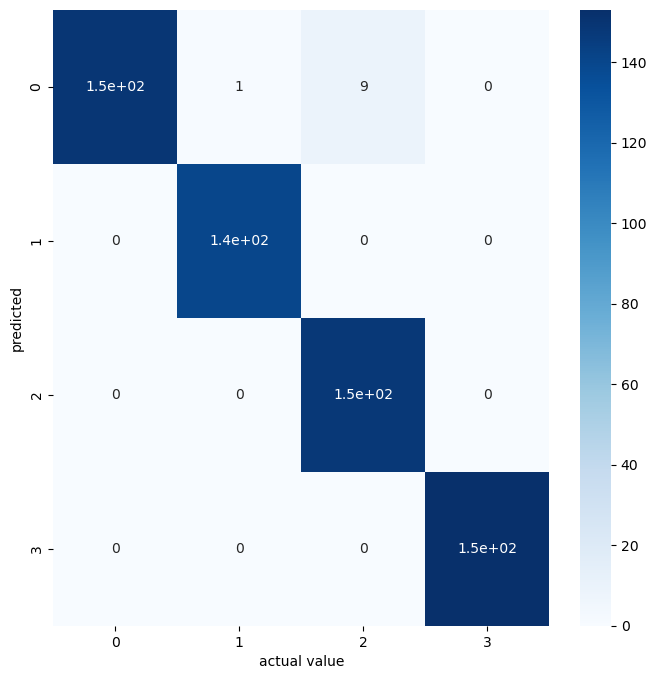

In [134]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap='Blues') #study
plt.xlabel("actual value")
plt.ylabel("predicted")

In [139]:
user_input = {
    'Age': int(input("enter your age")),
    'Gender': str(input("enter your gender (Male/Female)")),
    'Hydration_Level': input("enter your Hydration_Level (Low/High/Medium)"),
    'Oil_Level': input("enter your Oil_Level (Low/High/Medium)"),
    'Sensitivity': input("enter your Sensitivity (Low/High/Medium)"),
    'Humidity':float( input("enter your Humidity (any number between 20 - 80)")),
    'Temperature': float(input("enter your Temperature (any number between 10 - 35)")),
}

if 'Gender' in user_input:
    user_input['Gender'] = lbg.transform([user_input['Gender']])[0]
if 'Hydration_Level' in user_input:
    user_input['Hydration_Level'] = lbh.transform([user_input['Hydration_Level']])[0]
if 'Oil_Level' in user_input:
    user_input['Oil_Level'] = lbo.transform([user_input['Oil_Level']])[0]
if 'Sensitivity' in user_input:
    user_input['Sensitivity'] = lbs.transform([user_input['Sensitivity']])[0]
    
    
    

# Convert the input to a DataFrame
user_input_df = pd.DataFrame([user_input])

# Make predictions
prediction = rf.predict(user_input_df)
predicted_target=lbt.inverse_transform(prediction)
print(f'Your skin type is {predicted_target[0]} ')
recomend=input('do u want routine and product recomentation? yes/no')
if recomend == 'yes':
    product=input('''select any brands given below:
    1.DOT AND KEY
    2.AQUALOGICA
    3.CERAVE
    ''')
else:
    print('Okay thank you')
#routine suggetion
if predicted_target[0]=='Dry':
    print('''Follow the following routine:
           Cleanser: Use a hydrating, non-foaming cleanser to avoid stripping natural oils.
           Toner: Use a hydrating toner with ingredients like glycerin or hyaluronic acid.
           Serum: Apply a serum with hyaluronic acid and vitamin E for extra hydration.
           Moisturizer: Use a rich, emollient moisturizer to lock in moisture.
           Sunscreen: Use a moisturizing sunscreen with SPF 30 or higher during the day.
           Night Care: Consider a heavier night cream or an overnight hydrating mask.
          ''')
elif predicted_target[0]=='Combination':
    print('''Follow the following routine:
           Cleanser: Use a gentle, balancing cleanser.
           Toner: Apply a toner that helps to balance oily and dry areas.
           Serum: Use a hydrating serum on dry areas and a niacinamide serum on oily areas.
           Moisturizer: Use a lightweight moisturizer on oily areas and a richer one on dry areas.
           Sunscreen: Use a broad-spectrum SPF 30 or higher.
          ''')
elif predicted_target[0]=='Normal':
    print('''Cleanser: Use a gentle, hydrating cleanser to remove dirt and impurities.
           Toner: Apply a mild, alcohol-free toner to balance the skin’s pH.
           Serum: Use a hydrating serum with ingredients like hyaluronic acid.
           Moisturizer: Apply a lightweight moisturizer.
           Sunscreen: Use a broad-spectrum SPF 30 or higher during the day.
  
          ''') 
elif predicted_target[0]=='Oily':
    print('''Cleanser: Use a foaming or gel cleanser to remove excess oil.
           Toner: Use a toner with salicylic acid to control oil and prevent breakouts.
           Serum: Use a lightweight serum with niacinamide to regulate oil production.
           Moisturizer: Apply a gel-based or oil-free moisturizer.
           Sunscreen: Use a mattifying sunscreen with SPF 30 or higher.

  
          ''') 
    
if product=='DOT AND KEY':
    product_links = {
    "Dry": {
        "Cleanser": "https://shorturl.at/YdOCL",
        "Moisturizer":"https://shorturl.at/kduT5",
        "Sunscreen": "http://surl.li/ujzsm"
    },
    "Combination": {
        "Cleanser": "https://shorturl.at/aamgL",
        "Moisturizer": "https://shorturl.at/uwAzm",
        "Sunscreen": "https://shorturl.at/27Db1",
    },
    "Oily": {
        "Cleanser": "https://shorturl.at/v2NPK",
        "Moisturizer": "https://rb.gy/np3nz1",
        "Sunscreen": "https://rb.gy/3l58gu",
    },
    "Normal": {
        "Cleanser": "https://rb.gy/6g3vv3",
        "Moisturizer": "https://t.ly/tcCSK",
        "Sunscreen": "https://t.ly/DUnNN"
    },
}
    for skin_type, products in product_links.items():
        if skin_type==predicted_target[0]:
            print(f"{skin_type}:")
        for product, link in products.items():
            if skin_type==predicted_target[0]:
                print(f"\t{product}: {link}")
            
elif product=='AQUALOGICA':
    product_links = {
    "Dry": {
        "Cleanser": "https://www.aqualogica.com/products/dry-skin-cleanser",
        "Moisturizer": "https://www.aqualogica.com/products/dry-skin-moisturizer",
        "Sunscreen": "https://www.aqualogica.com/products/dry-skin-sunscreen",
    },
    "Combination": {
        "Cleanser": "https://www.aqualogica.com/products/combination-skin-cleanser",
        "Moisturizer": "https://www.aqualogica.com/products/combination-skin-moisturizer",
        "Sunscreen": "https://www.aqualogica.com/products/combination-skin-sunscreen",
    },
    "Oily": {
        "Cleanser": "https://www.aqualogica.com/products/oily-skin-cleanser",
        "Moisturizer": "https://www.aqualogica.com/products/oily-skin-moisturizer",
        "Sunscreen": "https://www.aqualogica.com/products/oily-skin-sunscreen",
    },
    "Normal": {
        "Cleanser": "https://t.ly/WtKkI",
        "Moisturizer": "https://t.ly/n57QO",
        "Sunscreen": "https://t.ly/AR52J",
    },
}
    for skin_type, products in product_links.items():
        if skin_type==predicted_target[0]:
            print(f"{skin_type}:")
        for product, link in products.items():
            if skin_type==predicted_target[0]:
                print(f"\t{product}: {link}")
            
            
elif product=='CERAVE':
    product_links = {
    "Dry": {
        "Cleanser": "https://www.cerave.com/cleansers/hydrating-facial-cleanser",
        "Moisturizer": "https://www.cerave.com/moisturizers/moisturizing-cream",
        "Sunscreen": "https://www.cerave.com/sunscreens/hydrating-mineral-sunscreen-spf-30",
    },
    "Combination": {
        "Cleanser": "https://www.cerave.com/cleansers/hydrating-facial-cleanser",
        "Moisturizer": "https://www.cerave.com/moisturizers/pm-facial-moisturizing-lotion",
        "Sunscreen": "https://www.cerave.com/sunscreens/ultra-light-moisturizing-lotion-spf-30",
    },
    "Oily": {
        "Cleanser": "https://www.cerave.com/cleansers/foaming-facial-cleanser",
        "Moisturizer": "https://www.cerave.com/moisturizers/pm-facial-moisturizing-lotion",
        "Sunscreen": "https://www.cerave.com/sunscreens/ultra-light-moisturizing-lotion-spf-30",
    },
    "Normal": {
        "Cleanser": "https://www.cerave.com/cleansers/hydrating-facial-cleanser",
        "Moisturizer": "https://www.cerave.com/moisturizers/daily-moisturizing-lotion",
        "Sunscreen": "https://www.cerave.com/sunscreens/am-facial-moisturizing-lotion-spf-30",
    },
    
}
    for skin_type, products in product_links.items():
        if skin_type==predicted_target[0]:
            print(f"{skin_type}:")
        for product, link in products.items():
            if skin_type==predicted_target[0]:
                print(f"\t{product}: {link}")


    



          
          
      

enter your age 31
enter your gender (Male/Female) Male
enter your Hydration_Level (Low/High/Medium) Low
enter your Oil_Level (Low/High/Medium) Medium
enter your Sensitivity (Low/High/Medium) Low
enter your Humidity (any number between 20 - 80) 34
enter your Temperature (any number between 10 - 35) 27


Your skin type is Combination 


do u want routine and product recomentation? yes/no yes
select any brands given below:
    1.DOT AND KEY
    2.AQUALOGICA
    3.CERAVE
     2


Follow the following routine:
           Cleanser: Use a gentle, balancing cleanser.
           Toner: Apply a toner that helps to balance oily and dry areas.
           Serum: Use a hydrating serum on dry areas and a niacinamide serum on oily areas.
           Moisturizer: Use a lightweight moisturizer on oily areas and a richer one on dry areas.
           Sunscreen: Use a broad-spectrum SPF 30 or higher.
          


In [141]:
user_input_df

,Age,Gender,Hydration_Level,Oil_Level,Sensitivity,Humidity,Temperature
0,31,1,1,2,1,34.0,27.0
